In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

"""
RAJ2000: Right Ascension (J2000) (float64)
DEJ2000: Declination (J2000) (float64)
nobs: Number of observations (int64)
Vmag: V-band magnitude (float64)
e_Vmag: Error in V-band magnitude (float64)
Bmag: B-band magnitude (float64)
e_Bmag: Error in B-band magnitude (float64)
gpmag: Gaia G-band magnitude (float64)
e_gpmag: Error in Gaia G-band magnitude (float64)
rpmag: Gaia RP-band magnitude (float64)
e_rpmag: Error in Gaia RP-band magnitude (float64)
ipmag: IP-band magnitude (float64)
e_ipmag: Error in IP-band magnitude (float64)
fuv_mag: FUV magnitude (float64)
nuv_mag: NUV magnitude (float64)
err:
present: Star type (?)
type:
min_mag:
max_mag:
"""

data = pd.read_csv("/content/whole_data_practice3.csv")
# display(data)
# display(data.info())
data["Corr"] = data["Vmag"] + data["Bmag"] + data["gpmag"] + data["rpmag"] + data["ipmag"]
# data["fuv_mag**2"] = data["fuv_mag"] ** 2
data = data.drop(columns=[
    "type", # gives information about classes :(
    # "err", "type", "min_mag", "max_mag", # removing data with no description
    "e_Vmag", "e_Bmag", "e_gpmag", "e_rpmag", "e_ipmag", # don't know how to process this (probably use trees)
    "Vmag", "Bmag", "gpmag", "rpmag", "ipmag", # strongly correlated features
    # "nuv_mag", "fuv_mag", # multiplied
    "nobs" # useless data
                         ])
display(data)
display(data.info())
display(data.min_mag.value_counts())
display(data.describe())
data = data.dropna()
# data[data["type"].notna()].loc[lambda a: a["present"] == 1]
# data["pred"] = data["type"].notna().apply(lambda x: int(x))
# f1_score(data["pred"], data["present"])

,RAJ2000,DEJ2000,fuv_mag,nuv_mag,err,present,min_mag,max_mag,Corr
0,129.872235,18.219273,22.017,15.786,4.888841,0,NaN,NaN,57.484
1,143.755605,4.997145,23.920,19.509,4.186825,0,NaN,NaN,72.270
2,141.550218,2.826565,23.090,16.583,3.763859,0,NaN,NaN,64.099
3,143.899031,4.676475,24.091,17.881,3.737819,0,NaN,NaN,69.978
4,141.728736,2.834912,22.714,17.651,3.639082,1,13.29,13.41,69.793
...,...,...,...,...,...,...,...,...,...
64983,121.733932,34.774408,23.701,16.685,0.000000,0,8.39,8.43,41.070
64984,164.209694,5.631360,20.023,13.518,0.000000,0,8.39,8.43,45.346
64985,197.822409,-3.915387,22.929,16.748,0.000000,0,8.39,8.43,43.382
64986,216.499182,6.938758,18.501,13.158,0.000000,0,8.39,8.43,47.354


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64988 entries, 0 to 64987
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RAJ2000  64988 non-null  float64
 1   DEJ2000  64988 non-null  float64
 2   fuv_mag  64988 non-null  float64
 3   nuv_mag  64988 non-null  float64
 4   err      64988 non-null  float64
 5   present  64988 non-null  int64  
 6   min_mag  64984 non-null  float64
 7   max_mag  64984 non-null  float64
 8   Corr     64988 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 4.5 MB


None

,count
min_mag,
14.000,340
12.940,333
12.700,315
13.630,300
14.200,294
...,...
16.055,1
15.755,1
14.267,1


,RAJ2000,DEJ2000,fuv_mag,nuv_mag,err,present,min_mag,max_mag,Corr
count,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64984.000000,64984.000000,64988.000000
mean,189.900410,5.743908,22.010904,17.405586,0.172671,0.101311,13.060289,9.788631,65.683343
std,117.334916,20.524489,1.792885,1.994318,0.174754,0.301742,1.630775,5.841919,9.392072
min,0.007155,-53.300726,11.961000,11.226000,0.000000,0.000000,5.010000,0.001000,29.833000
25%,117.916037,-3.589013,21.269000,16.086000,0.087936,0.000000,12.040000,0.740000,58.723750
50%,168.777423,1.502730,22.554000,17.098000,0.127098,0.000000,13.220000,12.640000,64.851000
75%,322.452068,13.339830,23.283000,18.435000,0.189806,0.000000,14.200000,13.870000,73.298000
max,359.995160,69.080703,24.849000,24.624000,4.888841,1.000000,19.600000,20.470000,86.950000


# Vizualizing data

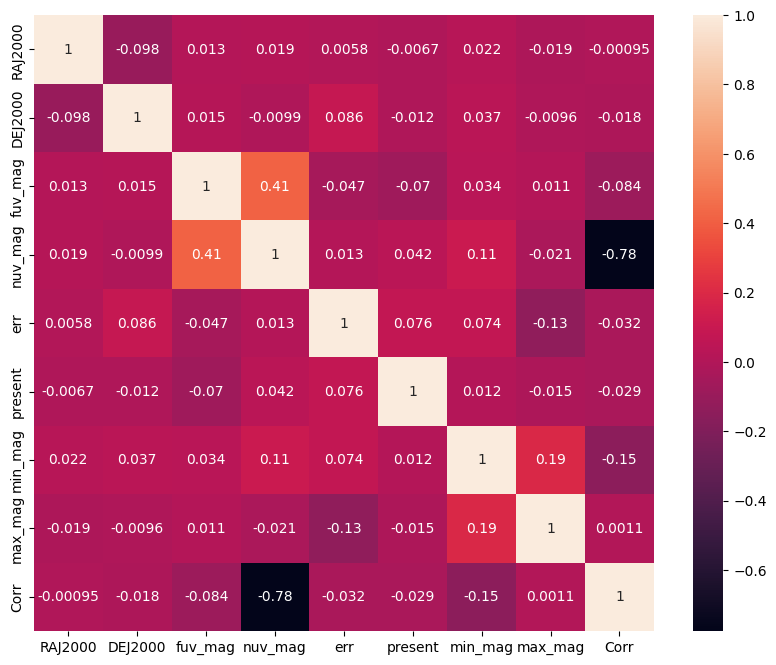

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot = True)
plt.show()

In [ ]:
sns.pairplot(data, hue="present")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Preprocessing

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data[["Corr", "RAJ2000", "DEJ2000"]])
data[["Corr", "RAJ2000", "DEJ2000"]] = scaler.transform(data[["Corr", "RAJ2000", "DEJ2000"]])
data.describe()

,RAJ2000,DEJ2000,fuv_mag,nuv_mag,err,present,min_mag,max_mag,Corr
count,64984.000000,64984.000000,64984.000000,64984.000000,64984.000000,64984.000000,64984.000000,64984.000000,64984.000000
mean,0.527507,0.482463,22.010826,17.405584,0.172427,0.101317,13.060289,9.788631,0.627665
std,0.325949,0.167714,1.792901,1.994348,0.171920,0.301751,1.630775,5.841919,0.164439
min,0.000000,0.000000,11.961000,11.226000,0.000000,0.000000,5.010000,0.001000,0.000000
25%,0.327533,0.406197,21.269000,16.086000,0.087932,0.000000,12.040000,0.740000,0.505817
50%,0.468871,0.447801,22.554000,17.098000,0.127092,0.000000,13.220000,12.640000,0.613092
75%,0.895724,0.544532,23.283000,18.435000,0.189799,0.000000,14.200000,13.870000,0.760986
max,1.000000,1.000000,24.849000,24.624000,3.639082,1.000000,19.600000,20.470000,1.000000


# Creating training & testing sets

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN

# Oversampling
smote = ADASYN(random_state=42, sampling_strategy=0.5)

display(data.present.value_counts())
X_resampled, y_resampled = smote.fit_resample(data.drop(columns=["present"]), data.present)
display(y_resampled.value_counts())
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.7, random_state=42)

,count
present,
0,58400
1,6584


,count
present,
0,58400
1,29641


# Gradient boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

# Test data with oversampling

clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.,
    max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
display(f1_score(y_test, y_pred))
display(accuracy_score(y_test, y_pred))
display(confusion_matrix(y_test, y_pred))

0.8942409860451938

0.9273231757776371

array([[38214,  2740],
       [ 1739, 18936]])

In [30]:
intersecting_indices = set(X_train.index).intersection(set(data.index))
X_test_new, y_test_new = data.drop(columns=["present"]).drop(intersecting_indices), data["present"].drop(intersecting_indices)
y_pred = clf.predict(X_test_new)
display(f1_score(y_test_new, y_pred))
display(accuracy_score(y_test_new, y_pred))
display(confusion_matrix(y_test_new, y_pred))

0.7613386173491854

0.9443360377939817

array([[16661,   848],
       [  236,  1729]])

In [31]:
from sklearn.metrics import recall_score
display(recall_score(y_test_new, y_pred))

0.8798982188295166

# Stacking GB

In [54]:
from sklearn.ensemble import StackingClassifier

from sklearn.linear_model import LogisticRegression

base_learners = [
    ('gb1', GradientBoostingClassifier(n_estimators=100, learning_rate=1.,
    max_depth=3, random_state=42)),
    ('gb2', GradientBoostingClassifier(n_estimators=100, learning_rate=1.,
    max_depth=3, random_state=43)),
    ('gb3', GradientBoostingClassifier(n_estimators=100, learning_rate=1.,
    max_depth=3, random_state=44)),
]
meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

model_stack = stacking_model.fit(X_train, y_train)
pred_stack = stacking_model.predict(X_test)

In [55]:
display(f1_score(y_test, pred_stack))
display(recall_score(y_test, pred_stack))
display(accuracy_score(y_test, pred_stack))
display(confusion_matrix(y_test, pred_stack))

pred_stack_new = stacking_model.predict(X_test_new)
display(f1_score(y_test_new, pred_stack_new))
display(recall_score(y_test_new, pred_stack_new))
display(accuracy_score(y_test_new, pred_stack_new))
display(confusion_matrix(y_test_new, pred_stack_new))

0.8682590612002377

0.8834824667472794

0.9100585763195898

array([[37820,  3134],
       [ 2409, 18266]])

0.6926889714993805

0.8534351145038168

0.9235904282633255

array([[16309,  1200],
       [  288,  1677]])